# AI识别甲骨文实验：用神经网络解读三千年前的文字

**基于 ResNet50 深度学习模型的甲骨文字符识别**

---

## 课程简介

本实验将带你体验如何使用人工智能识别中国最古老的成熟文字——甲骨文。你将学习：

1. **甲骨文数据集**的结构与可视化
2. **卷积神经网络**如何学习图像特征
3. **加载预训练模型**进行文字识别
4. **批量测试**：验证AI的识别准确率
5. **深入分析**：探索AI的成功与失败案例

---

## 本实验使用的资源

本实验使用 **HUST-OBC 教学精简版** 数据集和预训练模型：

| 资源 | 说明 |
|------|------|
| 数据集 | 150个字符类别，1200张图片（5.4 MB） |
| 模型 | ResNet50 预训练权重（204 MB） |
| 准确率 | 94.6%（完整数据集测试结果） |

如需完整数据集（1588个字符类别，14万张图片），请访问：
- 官方GitHub：https://github.com/Pengjie-W/HUST-OBC
- Figshare下载：https://figshare.com/s/8a9c0420312d94fc01e3

---

## 什么是甲骨文？

| 特性 | 说明 |
|------|------|
| 年代 | 约公元前1300年-公元前1046年（商朝晚期） |
| 载体 | 龟甲、兽骨 |
| 用途 | 占卜记录 |
| 发现 | 1899年，河南安阳殷墟 |
| 数量 | 已发现约15万片，含4500余单字 |
| 解读 | 已识别约1500字，仍有大量未解读 |

甲骨文是汉字的源头，距今已有3000多年历史。

---

## 数据来源与引用

本实验数据和模型来自 **HUST-OBC**（华中科技大学甲骨文字符数据集）。

如使用本数据集，请引用原作者论文：

> Wang P, Zhang K, Wang X, et al. An open dataset for oracle bone script recognition and decipherment. *Scientific Data*, 2024.

---

## 目录

- [第零部分: 环境配置与准备](#part0)
- [第一部分: 认识甲骨文数据集](#part1)
- [第二部分: 理解AI如何识别文字](#part2)
- [第三部分: 加载预训练模型](#part3)
- [第四部分: 甲骨文识别实验](#part4)
- [第五部分: 深入探索与分析](#part5)
- [第六部分: 总结与思考](#part6)

---
<a id='part0'></a>
# 第零部分: 环境配置与准备

本部分将完成所有必要的准备工作：
- 检测GPU运行环境
- 安装必要的Python库
- 下载甲骨文数据集和预训练模型

**操作说明**：点击每个代码单元格左侧的运行按钮，或按 `Shift + Enter` 执行。

In [1]:
#@title ## 0.1 检查运行环境 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，检查你的Colab环境是否已正确配置GPU。
#@markdown
#@markdown 推荐配置：
#@markdown - GPU: A100 / V100 / T4
#@markdown - 如未检测到GPU，请点击菜单 `运行时` -> `更改运行时类型` -> 选择 `GPU`
#@markdown ---

import sys
import os

print("=" * 60)
print(" 环境检测")
print("=" * 60)

# Python 版本
print(f"\n Python 版本: {sys.version.split()[0]}")

# 检测是否在 Colab 环境
IN_COLAB = 'google.colab' in sys.modules
print(f" 运行环境: {'Google Colab' if IN_COLAB else '本地环境'}")

# GPU 检测
try:
    import subprocess
    result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'],
                          capture_output=True, text=True)
    if result.returncode == 0:
        gpu_info = result.stdout.strip()
        print(f"\n GPU 可用: {gpu_info}")
        print(" 状态: GPU环境已就绪")
    else:
        print("\n 未检测到 GPU")
        print(" 提示: 请在菜单中选择 运行时 -> 更改运行时类型 -> GPU")
except:
    print("\n 无法检测 GPU")

print("\n" + "=" * 60)

 环境检测

 Python 版本: 3.12.12
 运行环境: Google Colab

 GPU 可用: NVIDIA A100-SXM4-40GB, 40960 MiB
 状态: GPU环境已就绪



In [3]:
#@title ## 0.2 安装必要的库 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，安装本实验需要的Python库。
#@markdown
#@markdown 将安装以下库：
#@markdown - `torch`, `torchvision`: PyTorch深度学习框架
#@markdown - `pillow`: 图像处理
#@markdown - `matplotlib`: 数据可视化
#@markdown - `gdown`: 从Google Drive下载文件
#@markdown
#@markdown ---

print(" 正在安装依赖...")
print("-" * 40)

import subprocess
import sys

# 安装列表
packages = [
    ('torch', 'torch'),
    ('torchvision', 'torchvision'),
    ('pillow', 'PIL'),
    ('matplotlib', 'matplotlib'),
    ('gdown', 'gdown'),
    ('tqdm', 'tqdm'),
]

for i, (pkg_name, import_name) in enumerate(packages, 1):
    print(f"[{i}/{len(packages)}] 检查 {pkg_name}...")
    try:
        __import__(import_name)
        print(f"    已安装")
    except ImportError:
        print(f"    正在安装...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', pkg_name])
        print(f"    完成")

print("-" * 40)
print(" 所有依赖安装完成")

 正在安装依赖...
----------------------------------------
[1/6] 检查 torch...
    已安装
[2/6] 检查 torchvision...
    已安装
[3/6] 检查 pillow...
    已安装
[4/6] 检查 matplotlib...
    已安装
[5/6] 检查 gdown...
    已安装
[6/6] 检查 tqdm...
    已安装
----------------------------------------
 所有依赖安装完成


In [35]:
#@title ## 0.3 导入库并配置环境 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，导入所有需要的库并进行初始配置。
#@markdown ---

# 基础库
import os
import json
import random
import numpy as np
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# 图像处理
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# 深度学习
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader

# 进度条
from tqdm.notebook import tqdm

# 设置中文字体（Colab环境）
try:
    import subprocess
    subprocess.run(['apt-get', 'install', '-y', 'fonts-noto-cjk'],
                   capture_output=True, check=False)
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'SimHei', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# 设置绘图风格
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 设置随机种子（保证结果可复现）
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("=" * 60)
print(" 库导入完成")
print("=" * 60)
print(f"\n PyTorch 版本: {torch.__version__}")
print(f" 运行设备: {device}")
if torch.cuda.is_available():
    print(f" GPU型号: {torch.cuda.get_device_name(0)}")
print("\n 环境配置完成，可以开始实验")
print("=" * 60)

 库导入完成

 PyTorch 版本: 2.9.0+cu126
 运行设备: cuda
 GPU型号: NVIDIA A100-SXM4-40GB

 环境配置完成，可以开始实验


In [62]:
#@title ## 0.4 下载数据集和模型 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，下载甲骨文数据集和预训练模型。
#@markdown
#@markdown - 数据集：HUST-OBC 教学精简版（5.4 MB）
#@markdown - 模型：ResNet50 预训练权重（204 MB）
#@markdown
#@markdown ---

import os
import json

# 创建目录
WORK_DIR = '/content/oracle_bone'
DATA_DIR = os.path.join(WORK_DIR, 'data')
MODEL_DIR = os.path.join(WORK_DIR, 'models')
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)

print("=" * 60)
print(" 下载数据集和模型")
print("=" * 60)

# ============================================================
# 步骤1: 下载精简版数据集
# ============================================================
print("\n[1/3] 下载甲骨文数据集...")
DATASET_URL = "https://github.com/zhaoyanghao125-sudo/oracle-bone-teaching/releases/download/Database/HUST-OBC-Mini.zip"
DATASET_PATH = os.path.join(DATA_DIR, 'HUST-OBC-Mini.zip')
DECIPHERED_DIR = os.path.join(DATA_DIR, 'deciphered')

if not os.path.exists(DECIPHERED_DIR):
    !wget -q --show-progress -O {DATASET_PATH} "{DATASET_URL}"
    !unzip -q {DATASET_PATH} -d {DATA_DIR}
    !rm -f {DATASET_PATH}
    print("      完成")
else:
    print("      已存在，跳过")

# ============================================================
# 步骤2: 下载预训练模型
# ============================================================
print("\n[2/3] 下载预训练模型...")
MODEL_URL = "https://github.com/zhaoyanghao125-sudo/oracle-bone-teaching/releases/download/model/max_val_acc.pth"
MODEL_PATH = os.path.join(MODEL_DIR, 'max_val_acc.pth')

if not os.path.exists(MODEL_PATH) or os.path.getsize(MODEL_PATH) < 100000000:
    if os.path.exists(MODEL_PATH):
        os.remove(MODEL_PATH)
    !wget -q --show-progress -O {MODEL_PATH} "{MODEL_URL}"
    print("      完成")
else:
    print("      已存在，跳过")

# ============================================================
# 步骤3: 克隆GitHub获取代码
# ============================================================
print("\n[3/3] 克隆代码仓库...")
REPO_DIR = os.path.join(WORK_DIR, 'HUST-OBC-repo')
if not os.path.exists(REPO_DIR):
    !git clone -q https://github.com/Pengjie-W/HUST-OBC.git {REPO_DIR}
print("      完成")

# ============================================================
# 加载标签映射
# ============================================================
ID_TO_CHINESE = {}
id_json = os.path.join(DECIPHERED_DIR, 'ID_to_chinese.json')
if os.path.exists(id_json):
    with open(id_json, 'r', encoding='utf-8') as f:
        ID_TO_CHINESE = json.load(f)

# ============================================================
# 状态检查
# ============================================================
print("\n" + "=" * 60)
print(" 状态检查")
print("=" * 60)

# 数据集
if os.path.exists(DECIPHERED_DIR):
    n = len([d for d in os.listdir(DECIPHERED_DIR) if os.path.isdir(os.path.join(DECIPHERED_DIR, d))])
    print(f" 数据集: 就绪 ({n} 个字符类别)")
else:
    print(" 数据集: 未就绪")

# 模型
if os.path.exists(MODEL_PATH) and os.path.getsize(MODEL_PATH) > 100000000:
    size_mb = os.path.getsize(MODEL_PATH) / (1024 * 1024)
    print(f" 模型: 就绪 ({size_mb:.1f} MB)")
else:
    print(" 模型: 未就绪")

# 标签
print(f" 标签: {len(ID_TO_CHINESE)} 个字符映射")

print("=" * 60)

 下载数据集和模型

[1/3] 下载甲骨文数据集...
/content/oracle_bon 100%[===================>]   5.99M  17.9MB/s    in 0.3s    
      完成

[2/3] 下载预训练模型...
/content/oracle_bon 100%[===================>] 204.53M  8.76MB/s    in 23s     
      完成

[3/3] 克隆代码仓库...
      完成

 状态检查
 数据集: 就绪 (150 个字符类别)
 模型: 就绪 (204.5 MB)
 标签: 1781 个字符映射


---
<a id='part1'></a>
# 第一部分: 认识甲骨文数据集

在这一部分，我们将探索HUST-OBC数据集的结构，了解甲骨文图像的特点。

In [63]:
#@title ## 1.1 探索数据集结构 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，查看数据集的基本信息。
#@markdown ---

print("=" * 60)
print(" HUST-OBC 数据集概览")
print("=" * 60)

# 统计数据集
def count_dataset(base_dir):
    """统计数据集中的类别和图像数量"""
    stats = {'categories': 0, 'images': 0, 'per_category': []}

    if not os.path.exists(base_dir):
        return stats

    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            images = [f for f in os.listdir(category_path)
                     if f.endswith(('.png', '.jpg', '.jpeg'))]
            if images:
                stats['categories'] += 1
                stats['images'] += len(images)
                stats['per_category'].append(len(images))

    return stats

# 统计已解读字符
deciphered_stats = count_dataset(DECIPHERED_DIR)

print("\n 已解读字符（deciphered）:")
print(f"   - 字符类别数: {deciphered_stats['categories']}")
print(f"   - 图像总数: {deciphered_stats['images']}")
if deciphered_stats['per_category']:
    print(f"   - 每类平均图像数: {np.mean(deciphered_stats['per_category']):.1f}")
    print(f"   - 每类最少图像数: {min(deciphered_stats['per_category'])}")
    print(f"   - 每类最多图像数: {max(deciphered_stats['per_category'])}")

# 统计未解读字符
UNDECIPHERED_DIR = os.path.join(DATA_DIR, 'HUST-OBC', 'undeciphered')
if os.path.exists(UNDECIPHERED_DIR):
    undeciphered_count = 0
    for subdir in os.listdir(UNDECIPHERED_DIR):
        subdir_path = os.path.join(UNDECIPHERED_DIR, subdir)
        if os.path.isdir(subdir_path):
            undeciphered_count += len([f for f in os.listdir(subdir_path)
                                       if f.endswith(('.png', '.jpg', '.jpeg'))])
    print(f"\n 未解读字符（undeciphered）:")
    print(f"   - 图像总数: {undeciphered_count}")
    print(f"   - 这些字符至今仍是未解之谜")

print("\n" + "-" * 60)
print(" 数据集特点:")
print("   1. 图像来源多样：甲骨拓片、摹本、字典等")
print("   2. 同一字符有多种写法（异体字）")
print("   3. 图像质量参差不齐，部分残缺")
print("   4. 类别分布不均衡")
print("=" * 60)

 HUST-OBC 数据集概览

 已解读字符（deciphered）:
   - 字符类别数: 150
   - 图像总数: 1200
   - 每类平均图像数: 8.0
   - 每类最少图像数: 8
   - 每类最多图像数: 8

------------------------------------------------------------
 数据集特点:
   1. 图像来源多样：甲骨拓片、摹本、字典等
   2. 同一字符有多种写法（异体字）
   3. 图像质量参差不齐，部分残缺
   4. 类别分布不均衡


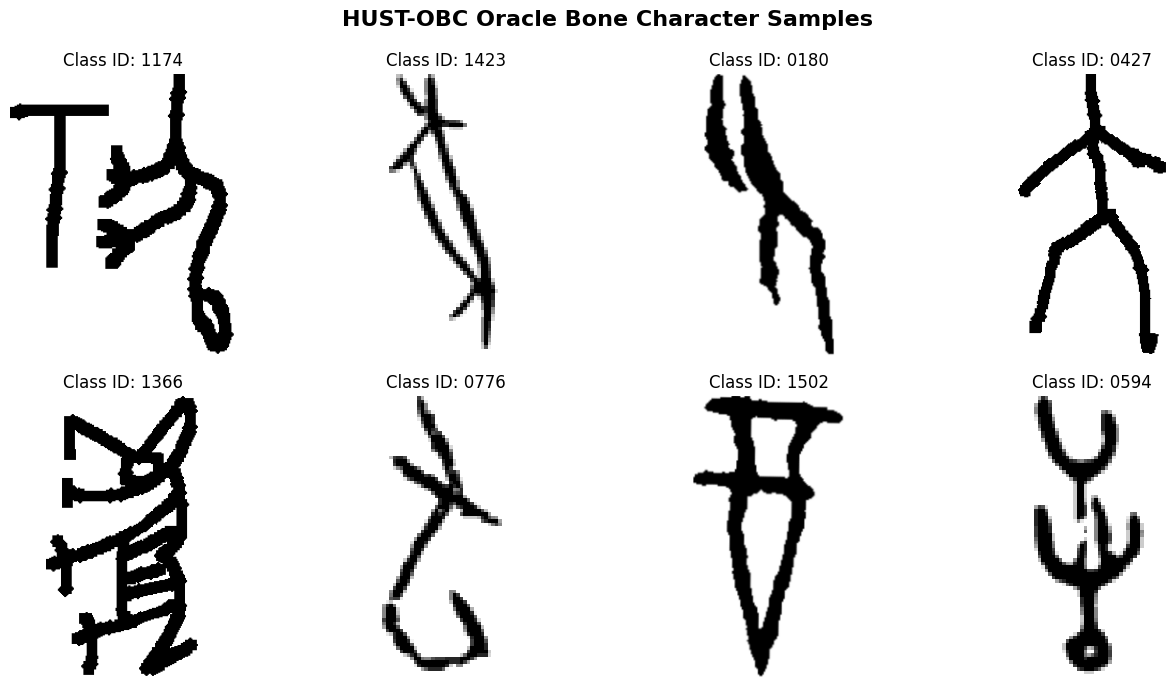


 图片说明
 上图展示了8个随机选取的甲骨文字符样本。
 每张图片对应的现代汉字如下：
------------------------------------------------------------
   Class ID 1174 = 祝
   Class ID 1423 = 豕
   Class ID 0180 = 允
   Class ID 0427 = 大
   Class ID 1366 = 虎
   Class ID 0776 = 旬
   Class ID 1502 = 酉
   Class ID 0594 = 屰
------------------------------------------------------------
 可以看到，甲骨文的形态与现代汉字有明显差异，但仍保留了象形特征。


In [64]:
#@title ## 1.2 可视化甲骨文字符 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，随机展示一些甲骨文字符样本。
#@markdown ---

def get_sample_images(base_dir, n_categories=8, n_per_category=1):
    """从数据集中获取样本图像"""
    samples = []

    if not os.path.exists(base_dir):
        return samples

    categories = [d for d in os.listdir(base_dir)
                  if os.path.isdir(os.path.join(base_dir, d))
                  and not d.endswith('.json')]

    # 随机选择类别
    selected = random.sample(categories, min(n_categories, len(categories)))

    for cat_id in selected:
        cat_path = os.path.join(base_dir, cat_id)
        images = [f for f in os.listdir(cat_path)
                 if f.endswith(('.png', '.jpg', '.jpeg'))]

        if images:
            for img_name in random.sample(images, min(n_per_category, len(images))):
                img_path = os.path.join(cat_path, img_name)
                chinese_char = ID_TO_CHINESE.get(cat_id, f'ID:{cat_id}')
                samples.append((img_path, chinese_char, cat_id))

    return samples

# 获取样本
samples = get_sample_images(DECIPHERED_DIR, n_categories=8, n_per_category=1)

if samples:
    # 绘制
    fig, axes = plt.subplots(2, 4, figsize=(14, 7))
    fig.suptitle('HUST-OBC Oracle Bone Character Samples', fontsize=16, fontweight='bold')

    for idx, (img_path, chinese_char, cat_id) in enumerate(samples[:8]):
        ax = axes[idx // 4, idx % 4]

        try:
            img = Image.open(img_path).convert('RGB')
            ax.imshow(img)
            ax.set_title(f'Class ID: {cat_id}', fontsize=12)
            ax.axis('off')
        except Exception as e:
            ax.text(0.5, 0.5, 'Load Failed', ha='center', va='center')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

    # 打印中文说明
    print("\n" + "=" * 60)
    print(" 图片说明")
    print("=" * 60)
    print(" 上图展示了8个随机选取的甲骨文字符样本。")
    print(" 每张图片对应的现代汉字如下：")
    print("-" * 60)
    for img_path, chinese_char, cat_id in samples[:8]:
        print(f"   Class ID {cat_id} = {chinese_char}")
    print("-" * 60)
    print(" 可以看到，甲骨文的形态与现代汉字有明显差异，但仍保留了象形特征。")
    print("=" * 60)
else:
    print("警告: 未能加载样本图像，请检查数据集是否正确下载。")

 甲骨文异体字展示

同一个汉字在甲骨文中可能有多种写法，这是因为：
  1. 不同时期的书写习惯不同
  2. 不同贞人（占卜官）的书写风格不同
  3. 龟甲和兽骨的材质影响刻写效果
------------------------------------------------------------


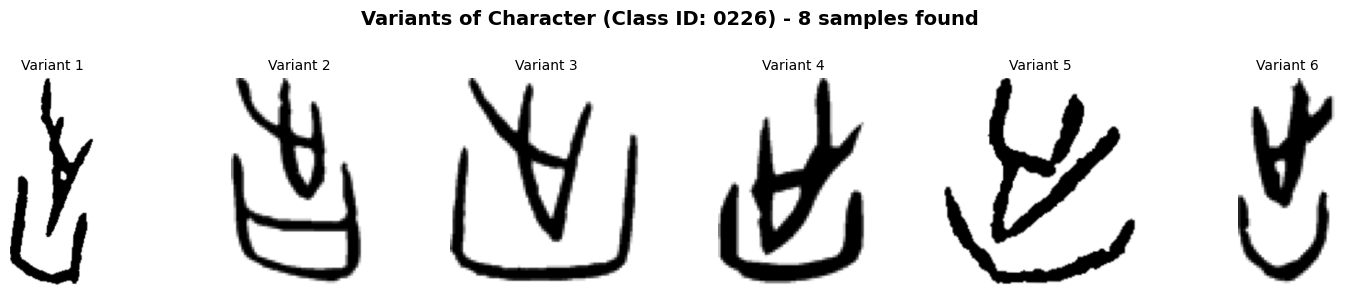


   上图展示的是「出」字的 6 种不同写法


In [68]:
#@title ## 1.3 同一字符的不同写法 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，展示同一个汉字在甲骨文中的多种写法。
#@markdown
#@markdown 这体现了古文字的「异体字」现象。
#@markdown ---

def show_character_variants(base_dir, cat_id, chinese_char, max_variants=6):
    """展示某个字符的多种写法"""
    cat_path = os.path.join(base_dir, cat_id)

    if not os.path.exists(cat_path):
        return False

    images = [f for f in os.listdir(cat_path)
             if f.endswith(('.png', '.jpg', '.jpeg'))]

    if not images:
        return False

    # 选择要展示的图像
    selected = random.sample(images, min(max_variants, len(images)))

    # 绘制
    n_cols = min(6, len(selected))
    fig, axes = plt.subplots(1, n_cols, figsize=(n_cols * 2.5, 3))
    if n_cols == 1:
        axes = [axes]

    fig.suptitle(f'Variants of Character (Class ID: {cat_id}) - {len(images)} samples found',
                 fontsize=14, fontweight='bold')

    for idx, img_name in enumerate(selected):
        img_path = os.path.join(cat_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            axes[idx].imshow(img)
            axes[idx].set_title(f'Variant {idx+1}', fontsize=10)
            axes[idx].axis('off')
        except:
            axes[idx].text(0.5, 0.5, 'Load Failed', ha='center', va='center')
            axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"\n   上图展示的是「{chinese_char}」字的 {len(selected)} 种不同写法")
    return True

# 展示异体字
print("=" * 60)
print(" 甲骨文异体字展示")
print("=" * 60)
print("\n同一个汉字在甲骨文中可能有多种写法，这是因为：")
print("  1. 不同时期的书写习惯不同")
print("  2. 不同贞人（占卜官）的书写风格不同")
print("  3. 龟甲和兽骨的材质影响刻写效果")
print("-" * 60)

# 获取数据集中实际存在的类别
available_ids = [d for d in os.listdir(DECIPHERED_DIR)
                 if os.path.isdir(os.path.join(DECIPHERED_DIR, d))]
random.shuffle(available_ids)

shown = False
for cat_id in available_ids[:5]:
    chinese_char = ID_TO_CHINESE.get(cat_id, '?')
    if show_character_variants(DECIPHERED_DIR, cat_id, chinese_char):
        shown = True
        break

if not shown:
    print("\n提示: 未能展示异体字，请检查数据集内容。")

print("=" * 60)

---
<a id='part2'></a>
# 第二部分: 理解AI如何识别文字

在这一部分，我们将了解卷积神经网络（CNN）如何从图像中学习特征，实现文字识别。

 卷积神经网络（CNN）图像分类原理

一、图像在计算机中的表示
--------------------------
图像 = 像素矩阵
- 灰度图: H x W 的二维矩阵，每个值 0-255
- 彩色图: H x W x 3 的三维矩阵 (RGB三通道)

例如，一张 64x64 的甲骨文图像 = 4,096 个数字



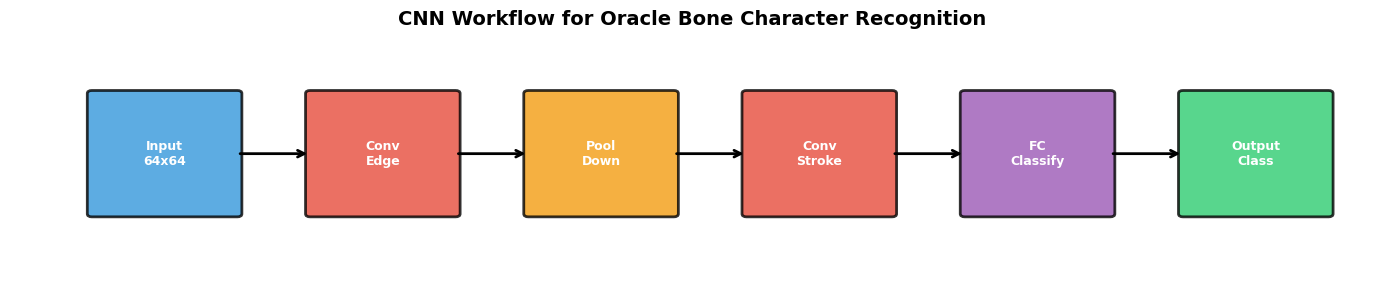


二、上图CNN识别甲骨文工作流程说明（从左到右）
--------------------------
1. Input (输入层): 原始甲骨文图像，如 64x64 像素
2. Conv Layer (卷积层): 提取边缘、笔画等局部特征
3. Pooling (池化层): 降低分辨率，保留关键信息
4. Conv Layer (卷积层): 提取更复杂的笔画组合特征
5. FC Layer (全连接层): 综合所有特征进行分类决策
6. Output (输出层): 输出预测的字符类别ID

三、每一层的作用
--------------------------
1. 卷积层 (Convolution):
   - 用小窗口（卷积核）扫描图像
   - 提取局部特征：边缘、角点、纹理
   - 浅层：简单特征（横线、竖线、斜线）
   - 深层：复杂特征（笔画组合、结构）

2. 池化层 (Pooling):
   - 降低图像分辨率
   - 保留最重要的特征
   - 减少计算量

3. 全连接层 (Fully Connected):
   - 将所有特征汇总
   - 输出每个类别的概率
   - 概率最高的类别 = 预测结果

四、为什么CNN适合识别甲骨文
--------------------------
1. 平移不变性：字符位置变化不影响识别
2. 局部特征：关注笔画结构，忽略噪声
3. 层级特征：从简单到复杂，逐步理解



In [69]:
#@title ## 2.1 图像分类原理 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，了解AI识别图像的基本原理。
#@markdown ---

print("=" * 60)
print(" 卷积神经网络（CNN）图像分类原理")
print("=" * 60)

print("""
一、图像在计算机中的表示
--------------------------
图像 = 像素矩阵
- 灰度图: H x W 的二维矩阵，每个值 0-255
- 彩色图: H x W x 3 的三维矩阵 (RGB三通道)

例如，一张 64x64 的甲骨文图像 = 4,096 个数字
""")

# 绘制CNN工作流程图
fig, ax = plt.subplots(1, 1, figsize=(14, 3))
ax.set_xlim(-0.5, 14.5)
ax.set_ylim(0, 4)
ax.axis('off')
ax.set_title('CNN Workflow for Oracle Bone Character Recognition', fontsize=14, fontweight='bold')

# 定义颜色
colors = {
    'input': '#3498db',
    'conv': '#e74c3c',
    'pool': '#f39c12',
    'fc': '#9b59b6',
    'output': '#2ecc71'
}

# 绘制各层方块
boxes = [
    (1.2, 'Input\n64x64', colors['input']),
    (3.6, 'Conv\nEdge', colors['conv']),
    (6, 'Pool\nDown', colors['pool']),
    (8.4, 'Conv\nStroke', colors['conv']),
    (10.8, 'FC\nClassify', colors['fc']),
    (13.2, 'Output\nClass', colors['output']),
]

for x, label, color in boxes:
    box = FancyBboxPatch((x-0.8, 1), 1.6, 2, boxstyle="round,pad=0.05",
                          facecolor=color, edgecolor='black', linewidth=2, alpha=0.8)
    ax.add_patch(box)
    ax.text(x, 2, label, ha='center', va='center', fontsize=9, fontweight='bold', color='white')

# 绘制箭头
arrow_x = [2, 4.4, 6.8, 9.2, 11.6]
for x in arrow_x:
    ax.annotate('', xy=(x+0.8, 2), xytext=(x, 2),
                arrowprops=dict(arrowstyle='->', color='black', lw=2))

plt.tight_layout()
plt.show()

print("""
二、上图CNN识别甲骨文工作流程说明（从左到右）
--------------------------
1. Input (输入层): 原始甲骨文图像，如 64x64 像素
2. Conv Layer (卷积层): 提取边缘、笔画等局部特征
3. Pooling (池化层): 降低分辨率，保留关键信息
4. Conv Layer (卷积层): 提取更复杂的笔画组合特征
5. FC Layer (全连接层): 综合所有特征进行分类决策
6. Output (输出层): 输出预测的字符类别ID

三、每一层的作用
--------------------------
1. 卷积层 (Convolution):
   - 用小窗口（卷积核）扫描图像
   - 提取局部特征：边缘、角点、纹理
   - 浅层：简单特征（横线、竖线、斜线）
   - 深层：复杂特征（笔画组合、结构）

2. 池化层 (Pooling):
   - 降低图像分辨率
   - 保留最重要的特征
   - 减少计算量

3. 全连接层 (Fully Connected):
   - 将所有特征汇总
   - 输出每个类别的概率
   - 概率最高的类别 = 预测结果

四、为什么CNN适合识别甲骨文
--------------------------
1. 平移不变性：字符位置变化不影响识别
2. 局部特征：关注笔画结构，忽略噪声
3. 层级特征：从简单到复杂，逐步理解
""")
print("=" * 60)

In [70]:
#@title ## 2.2 ResNet50 网络结构 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，了解本实验使用的ResNet50模型。
#@markdown ---

print("=" * 60)
print(" ResNet50 深度残差网络")
print("=" * 60)

print("""
一、为什么选择 ResNet50
--------------------------
| 特性       | 说明                           |
|------------|--------------------------------|
| 深度       | 50层，能学习复杂特征            |
| 残差连接   | 解决深层网络训练困难问题        |
| 预训练     | 在ImageNet上预训练，迁移学习    |
| 准确率     | 在HUST-OBC上达到 94.6%         |

二、残差连接的核心思想
--------------------------

传统网络:  输入 --> [层1] --> [层2] --> 输出

残差网络:  输入 --> [层1] --> [层2] --+-> 输出
            |                         |
            +----------- 跳跃连接 ----+

好处：
- 梯度可以直接传递，训练更稳定
- 可以训练非常深的网络
- 效果通常比浅层网络更好

三、模型参数
--------------------------
- 总参数量: 约 2,500 万
- 输入尺寸: 224 x 224 x 3
- 输出: 1,588 个类别（对应1,588个已解读汉字）
""")

# 可视化模型结构（简化版）
print("\n模型结构概览:")
print("-" * 60)
print("输入层:    224 x 224 x 3  (RGB图像)")
print("   |")
print("Conv1:     112 x 112 x 64  (初始卷积)")
print("   |")
print("Stage1:    56 x 56 x 256   (残差块 x 3)")
print("   |")
print("Stage2:    28 x 28 x 512   (残差块 x 4)")
print("   |")
print("Stage3:    14 x 14 x 1024  (残差块 x 6)")
print("   |")
print("Stage4:    7 x 7 x 2048    (残差块 x 3)")
print("   |")
print("AvgPool:   1 x 1 x 2048    (全局平均池化)")
print("   |")
print("FC:        1588            (全连接分类层)")
print("   |")
print("输出:      各类别概率")
print("=" * 60)

 ResNet50 深度残差网络

一、为什么选择 ResNet50
--------------------------
| 特性       | 说明                           |
|------------|--------------------------------|
| 深度       | 50层，能学习复杂特征            |
| 残差连接   | 解决深层网络训练困难问题        |
| 预训练     | 在ImageNet上预训练，迁移学习    |
| 准确率     | 在HUST-OBC上达到 94.6%         |

二、残差连接的核心思想
--------------------------

传统网络:  输入 --> [层1] --> [层2] --> 输出

残差网络:  输入 --> [层1] --> [层2] --+-> 输出
            |                         |
            +----------- 跳跃连接 ----+

好处：
- 梯度可以直接传递，训练更稳定
- 可以训练非常深的网络
- 效果通常比浅层网络更好

三、模型参数
--------------------------
- 总参数量: 约 2,500 万
- 输入尺寸: 224 x 224 x 3
- 输出: 1,588 个类别（对应1,588个已解读汉字）


模型结构概览:
------------------------------------------------------------
输入层:    224 x 224 x 3  (RGB图像)
   |
Conv1:     112 x 112 x 64  (初始卷积)
   |
Stage1:    56 x 56 x 256   (残差块 x 3)
   |
Stage2:    28 x 28 x 512   (残差块 x 4)
   |
Stage3:    14 x 14 x 1024  (残差块 x 6)
   |
Stage4:    7 x 7 x 2048    (残差块 x 3)
   |
AvgPool:   1 x 1 x 2048    (全局平均池化)
   

---
<a id='part3'></a>
# 第三部分: 加载预训练模型

在这一部分，我们将加载已经训练好的ResNet50模型，准备进行甲骨文识别。

In [71]:
#@title ## 3.1 加载模型权重 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，加载预训练的ResNet50模型。
#@markdown ---

print("=" * 60)
print(" 加载预训练模型")
print("=" * 60)

# 模型是用完整数据集(1588类)训练的
NUM_CLASSES = 1588  # 原始模型的类别数
print(f"\n 原始模型类别数: {NUM_CLASSES}")
print(f" 精简版数据集类别数: {len(ID_TO_CHINESE)}")

# 构建模型
print(" 构建 ResNet50 模型...")
model = models.resnet50(weights=None)
model.fc = nn.Linear(model.fc.in_features, NUM_CLASSES)

# 加载权重
print(" 加载预训练权重...")
if os.path.exists(MODEL_PATH):
    try:
        checkpoint = torch.load(MODEL_PATH, map_location=device)
        # 处理不同的checkpoint格式
        if isinstance(checkpoint, dict):
            if 'state_dict' in checkpoint:
                model.load_state_dict(checkpoint['state_dict'])
            elif 'model' in checkpoint:
                model.load_state_dict(checkpoint['model'])
            else:
                model.load_state_dict(checkpoint)
        else:
            model.load_state_dict(checkpoint)
        print(" 权重加载成功")
    except Exception as e:
        print(f" 权重加载失败: {e}")
        print(" 将使用随机初始化的权重（仅供演示）")
else:
    print(f" 警告: 模型文件不存在 ({MODEL_PATH})")
    print(" 将使用随机初始化的权重（仅供演示）")

# 移动到GPU并设置为评估模式
model = model.to(device)
model.eval()

print(f" 模型已加载到: {device}")
print("\n" + "=" * 60)
print(" 模型准备就绪")
print("=" * 60)

 加载预训练模型

 原始模型类别数: 1588
 精简版数据集类别数: 1781
 构建 ResNet50 模型...
 加载预训练权重...
 权重加载成功
 模型已加载到: cuda

 模型准备就绪


In [115]:
#@title ## 3.2 准备图像预处理 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，定义图像预处理流程。
#@markdown ---

print("=" * 60)
print(" 图像预处理配置")
print("=" * 60)

# 自定义预处理：先pad成正方形，再resize
class PadToSquare:
    """将图像填充为正方形"""
    def __call__(self, img):
        width, height = img.size
        if width > height:
            dy = width - height
            yl = dy // 2
            yr = dy - yl
            padding = (0, yl, 0, yr)
        else:
            dx = height - width
            xl = dx // 2
            xr = dx - xl
            padding = (xl, 0, xr, 0)
        return transforms.functional.pad(img, padding, fill=(255, 255, 255))

# 定义预处理变换（与训练时保持一致）
transform = transforms.Compose([
    PadToSquare(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.85233593, 0.85246795, 0.8517555],
        std=[0.31232414, 0.3122127, 0.31273854]
    )
])

print("""
预处理步骤（与训练时一致）:
--------------------------
1. PadToSquare()
   将图像填充为正方形（白色填充）
   保持原始宽高比

2. Resize(128, 128)
   将图像缩放至 128x128 像素

3. ToTensor()
   将图像转换为 PyTorch 张量
   像素值从 [0, 255] 归一化到 [0, 1]

4. Normalize(mean, std)
   使用数据集的均值和标准差进行标准化
   mean = [0.852, 0.852, 0.852]
   std  = [0.312, 0.312, 0.313]
""")

# 加载标签映射
print(" 加载标签映射...")

# 1. 加载 Validation_label.json (ID -> Index)
VALIDATION_LABEL_PATH = os.path.join(REPO_DIR, 'Validation', 'Validation_label.json')
if os.path.exists(VALIDATION_LABEL_PATH):
    with open(VALIDATION_LABEL_PATH, 'r', encoding='utf-8') as f:
        ID_TO_INDEX = json.load(f)
    INDEX_TO_ID = {v: k for k, v in ID_TO_INDEX.items()}
    print(f" 加载 Validation_label.json: {len(ID_TO_INDEX)} 个类别")
else:
    print(" 警告: 未找到 Validation_label.json")
    ID_TO_INDEX = {}
    INDEX_TO_ID = {}

# 2. 加载完整的 ID -> 中文字符 映射
FULL_ID_CHINESE_PATH = os.path.join(DECIPHERED_DIR, 'ID_to_chinese.json')

if os.path.exists(FULL_ID_CHINESE_PATH):
    with open(FULL_ID_CHINESE_PATH, 'r', encoding='utf-8') as f:
        FULL_ID_TO_CHINESE = json.load(f)
    print(f" 加载 ID_to_chinese.json: {len(FULL_ID_TO_CHINESE)} 个字符")
else:
    print(f" 警告: 未找到 {FULL_ID_CHINESE_PATH}")
    FULL_ID_TO_CHINESE = {}

# 3. 构建 Index -> 中文字符 映射
INDEX_TO_CHINESE = {}
for idx, cat_id in INDEX_TO_ID.items():
    chinese_char = FULL_ID_TO_CHINESE.get(cat_id, None)
    if chinese_char is None and '_' in cat_id:
        first_id = cat_id.split('_')[0]
        chinese_char = FULL_ID_TO_CHINESE.get(first_id, None)
    if chinese_char is None:
        chinese_char = f'[{cat_id}]'
    INDEX_TO_CHINESE[idx] = chinese_char

valid_count = sum(1 for v in INDEX_TO_CHINESE.values() if not v.startswith('['))
print(f" 构建 Index -> 中文字符 映射: {valid_count}/{len(INDEX_TO_CHINESE)} 个有效")
print("=" * 60)

 图像预处理配置

预处理步骤（与训练时一致）:
--------------------------
1. PadToSquare()
   将图像填充为正方形（白色填充）
   保持原始宽高比

2. Resize(128, 128)
   将图像缩放至 128x128 像素

3. ToTensor()
   将图像转换为 PyTorch 张量
   像素值从 [0, 255] 归一化到 [0, 1]

4. Normalize(mean, std)
   使用数据集的均值和标准差进行标准化
   mean = [0.852, 0.852, 0.852]
   std  = [0.312, 0.312, 0.313]

 加载标签映射...
 加载 Validation_label.json: 1588 个类别
 加载 ID_to_chinese.json: 1781 个字符
 构建 Index -> 中文字符 映射: 1588/1588 个有效


---
<a id='part4'></a>
# 第四部分: 甲骨文识别实验

在这一部分，我们将使用加载的模型进行甲骨文识别实验。

 单张图像识别测试

 测试图像: G_0423_乙4615合5775賓組.png
 真实类别: ID 0423 = 多


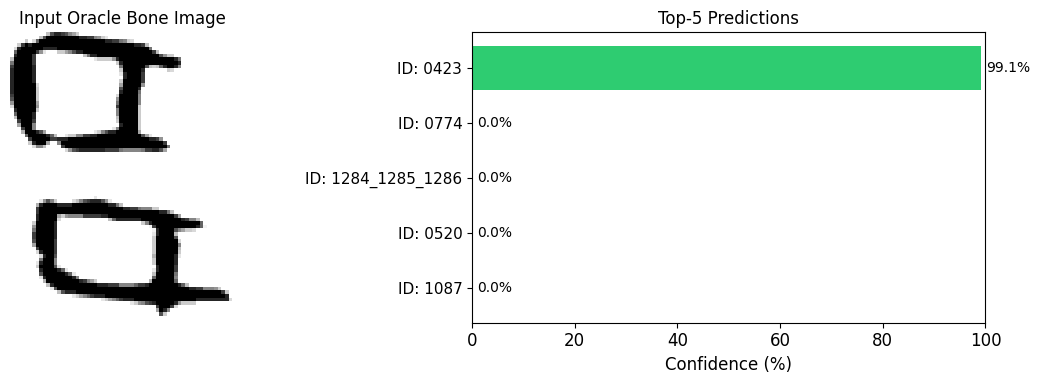


------------------------------------------------------------
 预测结果说明
------------------------------------------------------------
 Top-5 预测:
   1. ID 0423 = 多 (置信度: 99.1%) <-- 最高置信度
   2. ID 0774 = 旦 (置信度: 0.0%)
   3. ID 1284_1285_1286 = 聽 (置信度: 0.0%)
   4. ID 0520 = 孽 (置信度: 0.0%)
   5. ID 1087 = 申 (置信度: 0.0%)
------------------------------------------------------------
 真实标签: 多
 预测结果: 多
 判定: 正确


In [119]:
#@title ## 4.1 单张图像识别 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，对单张甲骨文图像进行识别。
#@markdown ---

def predict_single_image(model, img_path, transform, device):
    """对单张图像进行预测"""
    # 加载图像
    img = Image.open(img_path).convert('RGB')

    # 预处理
    img_tensor = transform(img).unsqueeze(0).to(device)

    # 预测
    with torch.no_grad():
        outputs = model(img_tensor)
        probs = F.softmax(outputs, dim=1)

        # 获取Top-5预测
        top5_probs, top5_indices = torch.topk(probs, 5)
        top5_probs = top5_probs.cpu().numpy()[0]
        top5_indices = top5_indices.cpu().numpy()[0]

    return img, top5_probs, top5_indices

def visualize_prediction(img, top5_probs, top5_indices, true_label=None, true_id=None):
    """可视化预测结果"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 左图：原始图像
    ax1.imshow(img)
    ax1.set_title('Input Oracle Bone Image', fontsize=12)
    ax1.axis('off')

    # 右图：预测概率 - 用ID显示
    pred_ids = [INDEX_TO_ID.get(idx, f'{idx}') for idx in top5_indices]
    colors = ['#2ecc71' if i == 0 else '#3498db' for i in range(5)]

    bars = ax2.barh(range(4, -1, -1), top5_probs * 100, color=colors)
    ax2.set_yticks(range(4, -1, -1))
    ax2.set_yticklabels([f'ID: {pid}' for pid in pred_ids], fontsize=11)
    ax2.set_xlabel('Confidence (%)', fontsize=12)
    ax2.set_title('Top-5 Predictions', fontsize=12)
    ax2.set_xlim(0, 100)

    # 添加数值标签
    for i, (bar, prob) in enumerate(zip(bars, top5_probs)):
        ax2.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{prob*100:.1f}%', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 打印中文说明
    print("\n" + "-" * 60)
    print(" 预测结果说明")
    print("-" * 60)

    # 获取预测的中文字符
    pred_chars = [INDEX_TO_CHINESE.get(idx, '?') for idx in top5_indices]

    print(" Top-5 预测:")
    for i, (idx, prob, char) in enumerate(zip(top5_indices, top5_probs, pred_chars)):
        pred_id = INDEX_TO_ID.get(idx, '?')
        marker = " <-- 最高置信度" if i == 0 else ""
        print(f"   {i+1}. ID {pred_id} = {char} (置信度: {prob*100:.1f}%){marker}")

    print("-" * 60)
    if true_label:
        pred_char = pred_chars[0]
        if pred_char == true_label:
            print(f" 真实标签: {true_label}")
            print(f" 预测结果: {pred_char}")
            print(" 判定: 正确")
        else:
            print(f" 真实标签: {true_label}")
            print(f" 预测结果: {pred_char}")
            print(" 判定: 错误")

# 随机选择一张图像进行测试
print("=" * 60)
print(" 单张图像识别测试")
print("=" * 60)

# 获取一个样本
test_samples = get_sample_images(DECIPHERED_DIR, n_categories=1, n_per_category=1)

if test_samples:
    img_path, true_char, cat_id = test_samples[0]
    print(f"\n 测试图像: {os.path.basename(img_path)}")
    print(f" 真实类别: ID {cat_id} = {true_char}")

    # 进行预测
    img, top5_probs, top5_indices = predict_single_image(model, img_path, transform, device)

    # 可视化
    visualize_prediction(img, top5_probs, top5_indices, true_label=true_char, true_id=cat_id)
else:
    print("警告: 未能加载测试图像")

print("=" * 60)

In [127]:
#@title ## 4.2 批量测试与统计 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，对多张图像进行批量测试，统计准确率。
#@markdown ---
#@markdown
#@markdown 测试数量：
N_TEST = 200  #@param {type:"slider", min:10, max:200, step:10}
#@markdown
#@markdown ---
print("=" * 60)
print(f" 批量测试 ({N_TEST} 张图像)")
print("=" * 60)

def batch_test(model, base_dir, n_samples, transform, device):
    """批量测试并统计准确率"""
    correct_top1 = 0
    correct_top5 = 0
    total = 0
    results = []

    # 收集所有图像路径
    all_images = []
    for cat_id in os.listdir(base_dir):
        cat_path = os.path.join(base_dir, cat_id)
        if os.path.isdir(cat_path):
            for img_name in os.listdir(cat_path):
                if img_name.endswith(('.png', '.jpg', '.jpeg')):
                    all_images.append((os.path.join(cat_path, img_name), cat_id))

    # 随机采样
    if len(all_images) > n_samples:
        test_images = random.sample(all_images, n_samples)
    else:
        test_images = all_images

    print(f"\n 正在测试 {len(test_images)} 张图像...\n")

    # 测试
    for img_path, true_id in tqdm(test_images, desc="识别进度"):
        try:
            img = Image.open(img_path).convert('RGB')
            img_tensor = transform(img).unsqueeze(0).to(device)

            with torch.no_grad():
                outputs = model(img_tensor)

                # Top-1 预测
                _, predicted = torch.max(outputs, 1)
                pred_idx = predicted.item()
                pred_id = INDEX_TO_ID.get(pred_idx, None)

                # Top-5 预测
                _, top5_indices = torch.topk(outputs, 5)
                top5_ids = [INDEX_TO_ID.get(idx.item(), None) for idx in top5_indices[0]]

            is_correct_top1 = (pred_id == true_id)
            is_correct_top5 = (true_id in top5_ids)

            if is_correct_top1:
                correct_top1 += 1
            if is_correct_top5:
                correct_top5 += 1
            total += 1

            results.append({
                'path': img_path,
                'true_id': true_id,
                'true_char': FULL_ID_TO_CHINESE.get(true_id, '?'),
                'pred_id': pred_id,
                'pred_char': FULL_ID_TO_CHINESE.get(pred_id, '?') if pred_id else '?',
                'correct_top1': is_correct_top1,
                'correct_top5': is_correct_top5
            })
        except Exception as e:
            continue

    acc_top1 = correct_top1 / total if total > 0 else 0
    acc_top5 = correct_top5 / total if total > 0 else 0
    return acc_top1, acc_top5, results

# 执行批量测试
if os.path.exists(DECIPHERED_DIR):
    acc_top1, acc_top5, test_results = batch_test(model, DECIPHERED_DIR, N_TEST, transform, device)

    print("\n" + "-" * 60)
    print(" 测试结果统计")
    print("-" * 60)
    print(f"   测试图像数: {len(test_results)}")
    print(f"   Top-1 正确数: {sum(1 for r in test_results if r['correct_top1'])}")
    print(f"   Top-5 正确数: {sum(1 for r in test_results if r['correct_top5'])}")
    print("-" * 60)
    print(f"   Top-1 准确率: {acc_top1*100:.1f}%")
    print(f"   Top-5 准确率: {acc_top5*100:.1f}%")
    print("-" * 60)

    print("\n 说明:")
    print("   - Top-1: 模型最高置信度的预测是否正确")
    print("   - Top-5: 正确答案是否在前5个预测中")
    print("   - 本测试使用精简版数据集(150类)，与论文测试集不同")
    print("   - 论文报告 Top-1 准确率: 94.6%（完整测试集）")
else:
    print("警告: 数据集不可用，无法进行批量测试")

print("\n" + "=" * 60)

 批量测试 (200 张图像)

 正在测试 200 张图像...



识别进度:   0%|          | 0/200 [00:00<?, ?it/s]


------------------------------------------------------------
 测试结果统计
------------------------------------------------------------
   测试图像数: 200
   Top-1 正确数: 198
   Top-5 正确数: 200
------------------------------------------------------------
   Top-1 准确率: 99.0%
   Top-5 准确率: 100.0%
------------------------------------------------------------

 说明:
   - Top-1: 模型最高置信度的预测是否正确
   - Top-5: 正确答案是否在前5个预测中
   - 本测试使用精简版数据集(150类)，与论文测试集不同
   - 论文报告 Top-1 准确率: 94.6%（完整测试集）



 识别结果可视化

 正确识别的案例:


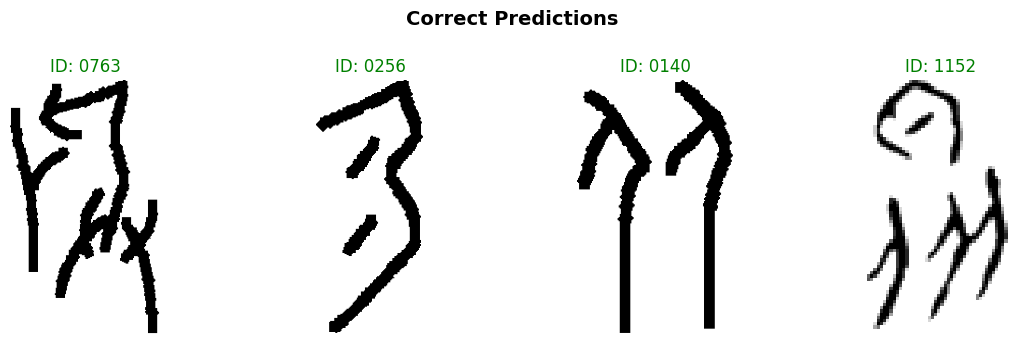

   上图显示的字符:
     ID 0763 = 新
     ID 0256 = 勿
     ID 0140 = 从
     ID 1152 = 眾

 错误识别的案例:


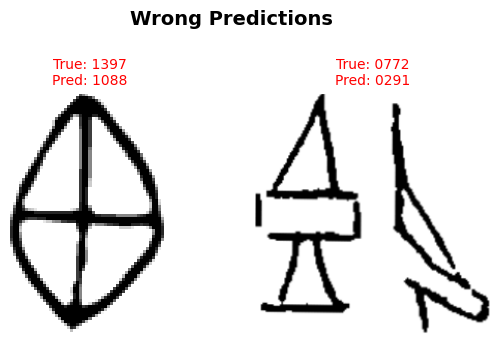

   上图显示的字符:
     真实: 西 → 预测: 甶
     真实: 既 → 预测: 即

 错误原因分析:
   1. 图像质量差（模糊、残缺）
   2. 异体字差异大
   3. 相似字符混淆
   4. 训练样本不足



In [135]:
#@title ## 4.3 批量识别结果可视化 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，可视化部分识别结果。
#@markdown ---

print("=" * 60)
print(" 识别结果可视化")
print("=" * 60)

if 'test_results' in dir() and test_results:
    # 随机打乱后选择案例
    shuffled_results = test_results.copy()
    random.shuffle(shuffled_results)

    correct_cases = [r for r in shuffled_results if r['correct_top1']][:4]
    wrong_cases = [r for r in shuffled_results if not r['correct_top1']][:4]

    # 可视化正确案例
    if correct_cases:
        print("\n 正确识别的案例:")
        fig, axes = plt.subplots(1, len(correct_cases), figsize=(3*len(correct_cases), 3.5))
        if len(correct_cases) == 1:
            axes = [axes]

        for idx, case in enumerate(correct_cases):
            img = Image.open(case['path']).convert('RGB')
            axes[idx].imshow(img)
            axes[idx].set_title(f"ID: {case['true_id']}", color='green', fontsize=12)
            axes[idx].axis('off')

        plt.suptitle('Correct Predictions', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # 打印中文说明
        print("   上图显示的字符:")
        for case in correct_cases:
            print(f"     ID {case['true_id']} = {case['true_char']}")

    # 可视化错误案例
    if wrong_cases:
        print("\n 错误识别的案例:")
        fig, axes = plt.subplots(1, len(wrong_cases), figsize=(3*len(wrong_cases), 3.5))
        if len(wrong_cases) == 1:
            axes = [axes]

        for idx, case in enumerate(wrong_cases):
            img = Image.open(case['path']).convert('RGB')
            axes[idx].imshow(img)
            axes[idx].set_title(f"True: {case['true_id']}\nPred: {case['pred_id']}", color='red', fontsize=10)
            axes[idx].axis('off')

        plt.suptitle('Wrong Predictions', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # 打印中文说明
        print("   上图显示的字符:")
        for case in wrong_cases:
            print(f"     真实: {case['true_char']} → 预测: {case['pred_char']}")

        print("\n 错误原因分析:")
        print("   1. 图像质量差（模糊、残缺）")
        print("   2. 异体字差异大")
        print("   3. 相似字符混淆")
        print("   4. 训练样本不足")
    else:
        print("\n 本次测试没有错误案例!")
else:
    print("请先运行批量测试单元格")

print("\n" + "=" * 60)

---
<a id='part5'></a>
# 第五部分: 深入探索与分析

在这一部分，我们将深入分析AI识别甲骨文的能力与局限。

In [146]:
#@title ## 5.1 未解读的甲骨文 { display-mode: "form" }
#@markdown ---
#@markdown ### 甲骨文解读现状
#@markdown
#@markdown | 统计项目 | 数量 |
#@markdown |----------|------|
#@markdown | 已发现单字总数 | 约 4,500 个 |
#@markdown | 已解读字符数 | 约 1,500 个 (33%) |
#@markdown | 未解读字符数 | 约 3,000 个 (67%) |
#@markdown
#@markdown ---
#@markdown ### HUST-OBC 数据集
#@markdown
#@markdown | 类型 | 类别数 | 图像数 |
#@markdown |------|--------|--------|
#@markdown | 已解读字符 | 1,588 类 | 77,064 张 |
#@markdown | 未解读字符 | 9,411 类 | 62,989 张 |
#@markdown
#@markdown 本实验使用精简版（150类已解读字符）
#@markdown
#@markdown 完整数据集下载: [Figshare](https://figshare.com/s/8a9c0420312d94fc01e3)
#@markdown
#@markdown ---
#@markdown ### 为什么这些字符难以解读？
#@markdown
#@markdown | 原因 | 说明 |
#@markdown |------|------|
#@markdown | 孤例字符 | 出现频率极低，难以对比 |
#@markdown | 缺乏上下文 | 无法从文意推断 |
#@markdown | 字形演变 | 与后世文字差异太大 |
#@markdown | 专有名词 | 可能是人名、地名 |
#@markdown | 残缺不全 | 载体破损导致字形不完整 |
#@markdown ---

In [145]:
#@title ## 5.2 AI的能力与局限 { display-mode: "form" }
#@markdown ---
#@markdown ### 一、AI的能力
#@markdown
#@markdown | 能力 | 说明 |
#@markdown |------|------|
#@markdown | ✓ 高效识别 | 毫秒级完成单张图像识别，比人工快数百倍 |
#@markdown | ✓ 批量处理 | 可同时处理成千上万张图像 |
#@markdown | ✓ 一致性强 | 同一图像每次识别结果相同 |
#@markdown | ✓ 学习异体字 | 能学习同一字符的多种写法 |
#@markdown | ✓ 辅助专家 | 为考古学家提供候选答案 |
#@markdown | ✓ 相似字检索 | 在海量甲骨中快速找出相似字符 |
#@markdown
#@markdown ---
#@markdown ### 二、AI的局限
#@markdown
#@markdown | 局限 | 说明 |
#@markdown |------|------|
#@markdown | ✗ 只能识别已知类 | 无法识别训练集中没有的字符 |
#@markdown | ✗ 缺乏语义理解 | 不理解文字含义，只做模式匹配 |
#@markdown | ✗ 依赖数据质量 | 图像模糊、残缺时准确率下降 |
#@markdown | ✗ 无法解读未知 | 不能破译从未见过的甲骨文 |
#@markdown | ✗ 黑盒决策 | 难以解释为什么做出某个预测 |
#@markdown | ✗ 缺乏常识推理 | 不懂"日+月=明"这样的造字逻辑 |
#@markdown
#@markdown ---
#@markdown ### 三、AI vs 人类专家
#@markdown
#@markdown | 场景 | AI表现 | 人类专家 |
#@markdown |------|--------|----------|
#@markdown | 识别已知字符 | 优秀(>90%) | 优秀 |
#@markdown | 处理大量图像 | 极快 | 很慢 |
#@markdown | 识别模糊图像 | 较差 | 较好 |
#@markdown | 解读未知字符 | 无法完成 | 可以尝试 |
#@markdown | 理解历史语境 | 无法完成 | 擅长 |
#@markdown | 跨学科论证 | 无法完成 | 擅长 |
#@markdown
#@markdown ---
#@markdown ### 四、AI能否「理解」甲骨文？
#@markdown
#@markdown 当前AI是**模式匹配**，不是真正理解。
#@markdown
#@markdown **它不懂：**
#@markdown - 造字原理（象形、指事、会意、形声）
#@markdown - 字在句子中的含义
#@markdown - 商朝的历史文化背景
#@markdown
#@markdown **真正理解需要：**
#@markdown - 多模态融合（图像+文本+知识图谱）
#@markdown - 推理能力（因果推断、类比推理）
#@markdown - 历史文化知识
#@markdown
#@markdown ---


---
<a id='part6'></a>
# 第六部分: 总结与思考

恭喜你完成了本次实验！

---
<a id='summary'></a>
# 课程总结

---

## 一、你学到了什么

### 1. 甲骨文基础知识
- 甲骨文是中国最早的成熟文字，距今3000多年
- 已发现约4500个单字，其中约1500个已解读
- 同一字符存在多种写法（异体字）

### 2. AI图像识别原理
- 卷积神经网络（CNN）可以从图像中提取特征
- ResNet50通过残差连接实现深层网络训练
- 预训练模型可以迁移到特定任务

### 3. 实践技能
- 在Colab上配置深度学习环境
- 加载和使用预训练模型
- 批量测试并评估模型性能

### 4. 批判性思考
- AI是工具，不是万能的
- 识别 ≠ 理解
- 技术需要与人文结合

---

## 二、延伸思考

1. AI能识别所有已知甲骨文，是否意味着它"懂"甲骨文？
2. AI在甲骨文研究中应该扮演什么角色？
3. 未来AI有可能真正"理解"古文字吗？
4. 人类专家与AI如何协作？

---


---
<a id='appendix'></a>
# 附录

---

## A. 常见问题 (FAQ)

**Q1: 为什么有些字符显示为问号或方框？**

A: 这是因为某些生僻汉字在当前字体中不支持显示。字符本身是正确的，只是无法渲染。

**Q2: 为什么测试准确率与论文报告不同？**

A: 本实验使用精简版数据集（150类），与论文使用的完整测试集（1588类）不同。数据分布差异会导致准确率变化。

**Q3: 模型能识别我手写的甲骨文吗？**

A: 可能效果不佳。模型是用标准化的甲骨文拓片训练的，对手写风格的泛化能力有限。

**Q4: 为什么同一个字有多种写法？**

A: 甲骨文没有统一的书写规范，不同贞人（占卜官）、不同时期、不同材质都会导致写法差异，这就是「异体字」现象。

**Q5: AI能帮助破译未知甲骨文吗？**

A: AI可以辅助检索相似字形，但真正的破译需要考古学、语言学、历史学的跨学科研究，AI只是工具之一。

---

## B. 术语表

| 术语 | 解释 |
|------|------|
| 甲骨文 | 刻在龟甲和兽骨上的商代文字 |
| 异体字 | 同一字符的不同写法 |
| CNN | 卷积神经网络，用于图像识别 |
| ResNet | 残差网络，深度学习模型架构 |
| 预训练 | 在大量数据上预先训练好的模型 |
| Top-1准确率 | 最高置信度预测正确的比例 |
| Top-5准确率 | 正确答案在前5个预测中的比例 |
| 置信度 | 模型对预测结果的确信程度 |
| Softmax | 将输出转换为概率分布的函数 |
| 归一化 | 将数据缩放到特定范围 |

---

## C. 拓展资源

| 资源 | 链接 | 说明 |
|------|------|------|
| HUST-OBC | https://github.com/Pengjie-W/HUST-OBC | 本实验使用的数据集 |
| 完整数据集 | https://figshare.com/s/8a9c0420312d94fc01e3 | 下载完整数据 |
| 殷墟甲骨文 | http://www.kaogubiji.com | 甲骨文研究资源 |
| PyTorch教程 | https://pytorch.org/tutorials/ | 深度学习框架教程 |
| ResNet论文 | https://arxiv.org/abs/1512.03385 | 原始论文 |

---

## D. 进阶学习建议

如果你对AI与古文字研究感兴趣，可以进一步学习：

1. **更多古文字**：金文、篆书、简牍文字的识别
2. **多任务学习**：同时进行识别、检索、生成
3. **跨模态研究**：结合文本语义理解古文字
4. **文化遗产AI**：敦煌壁画、古籍修复等应用

---

*本教学Notebook基于HUST-OBC数据集开发，仅供教学使用。*

*数据集引用: Wang P, et al. HUST-OBC: A Large-scale Oracle Bone Character Recognition Dataset.*